## Intial loading

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


## Matplotlib

In [0]:
df.plot()

In [0]:
df.sort_values('total_bill').plot(x='total_bill',y='tip')

In [0]:
df.sort_values('total_bill', inplace=True)
df.plot.scatter(x='total_bill', y='tip', c='size', colormap='viridis')
#plt.scatter(x=df['total_bill'],y=df['tip'], c=df['time'])

In [0]:
#df.loc[:,['tip','size']].plot(kind='bar')
df.loc[:,['tip','total_bill']].plot.barh(stacked=True)

In [0]:
df[['tip','total_bill']].plot.hist(alpha = 0.7, bins=20, orientation='horizontal')

In [0]:
df.boxplot(column=['tip','total_bill'], by=['sex','smoker'], figsize=(14,4))

In [0]:
df.columns

In [0]:
#plt.pie(x=df.tip, y=df.day)
df.groupby(['day']).sum()[['tip','total_bill']].plot.pie(subplots=True, figsize=(8,4), autopct='%0.2f')

In [0]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,alpha=0.8, diagonal='kde',figsize=(12,6))

In [0]:
df.plot.kde(subplots=True, sharex=False, figsize=(14,6))

## Seaborn

In [0]:
import seaborn as sns

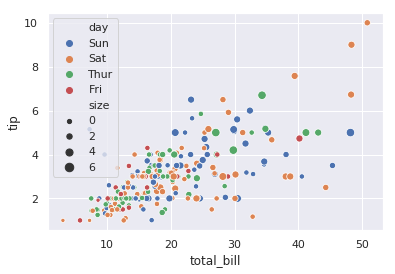

In [11]:
sns.set(style='darkgrid')
sns.scatterplot(x='total_bill',y='tip',data=df, hue='day', size='size')

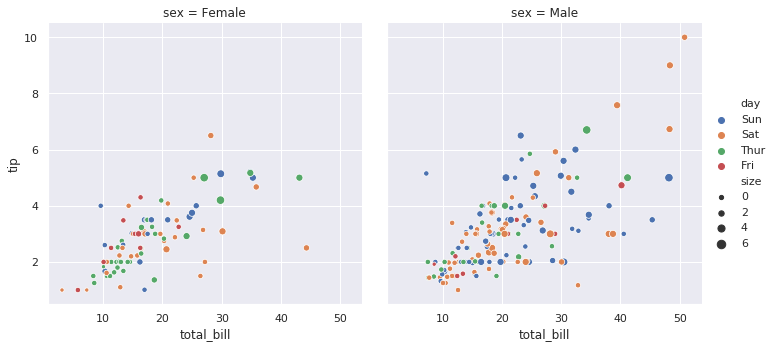

In [17]:
sns.relplot(x='total_bill',y='tip',hue='day',size='size',col='sex', data=df)

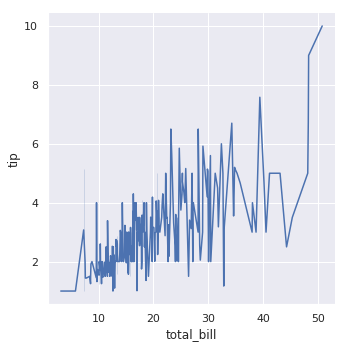

In [18]:
sns.relplot(kind='line',x='total_bill', y='tip', data=df)

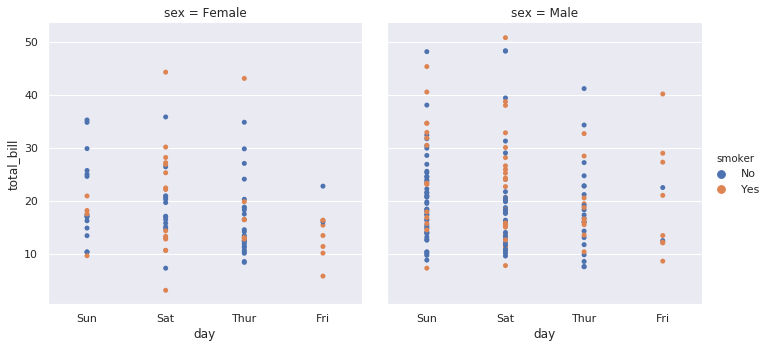

In [30]:
#sns.stripplot(x='day',y='total_bill', data=df)
sns.catplot(x='day', y='total_bill', hue='smoker', col='sex', data=df, jitter=False)

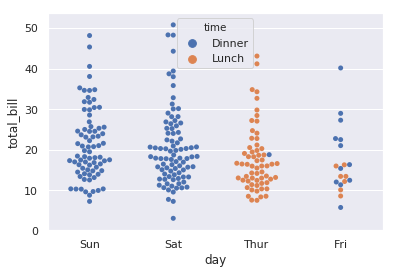

In [35]:
sns.swarmplot(x='day',y='total_bill', hue='time', data=df)

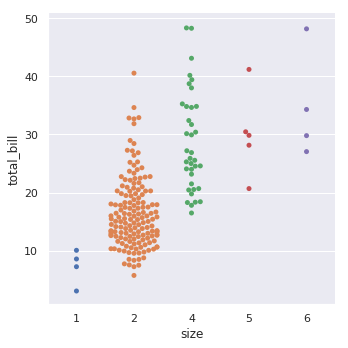

In [34]:
sns.catplot(x='size',y='total_bill', kind='swarm',data=df.query('size !=3'))

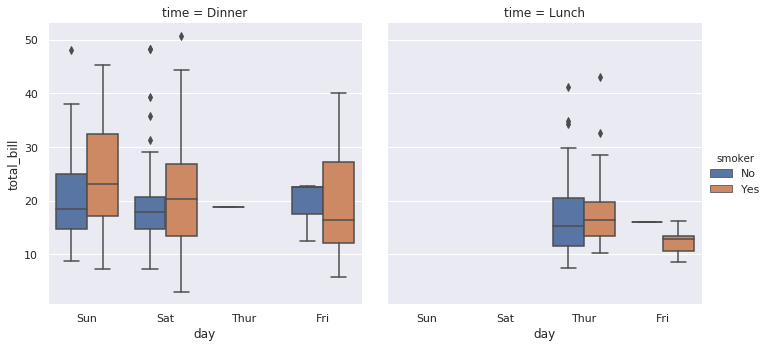

In [41]:
sns.catplot(kind='box', y='total_bill', x='day', col='time', hue='smoker', data=df)

In [43]:
diamonds = sns.load_dataset('diamonds')
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


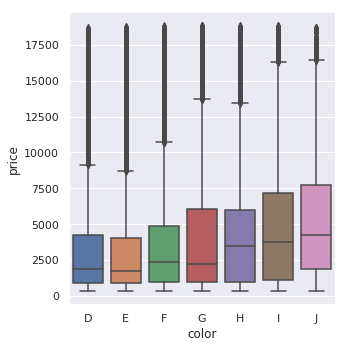

In [47]:
sns.catplot(kind='box',x='color',y='price',data=diamonds.sort_values('color'))

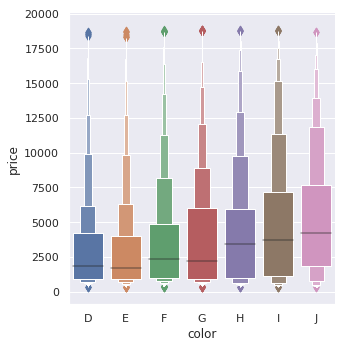

In [48]:
sns.catplot(kind='boxen',x='color',y='price',data=diamonds.sort_values('color'))